In [2]:
import numpy as np
import pandas as pd
#import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from fastai.structured import *
import matplotlib.pyplot as plt
import os
import glob

from numpy import nan as Nan

In [2]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
all_files = glob.glob("*.csv")

In [4]:
#Read all csv files

li = []
for filename in all_files:
    df = pd.read_csv(filename, sep=',', header=1, low_memory=False) #read csv
    li.append(df)

In [5]:
crypto_data = pd.concat(li, axis=0, ignore_index=True)

In [6]:
crypto_data = crypto_data.drop(columns=['Unix Timestamp'])

In [7]:
crypto_data['Date'] = pd.to_datetime(crypto_data['Date'])
#crypto_data['Date'] = pd.to_numeric(crypto_data['Date'])

In [18]:
df_btc = crypto_data[crypto_data['Symbol'] == 'BTCUSD']
df_eth = crypto_data[crypto_data['Symbol'] == 'ETHUSD']

In [19]:
df_btc = df_btc.sort_values(by=['Date'], ascending=True)
df_eth = df_eth.sort_values(by=['Date'], ascending=True)

In [20]:
crypto_data = pd.concat([df_btc, df_eth], axis=0, ignore_index=True)

In [21]:
df_btc = df_btc.reset_index(drop = True)
df_eth = df_eth.reset_index(drop = True)

In [22]:
crypto_data['Symbol'].value_counts()

BTCUSD    1745824
ETHUSD    1559257
Name: Symbol, dtype: int64

In [23]:
crypto_data.shape

(3305081, 7)

# Plot BTC and ETH high value

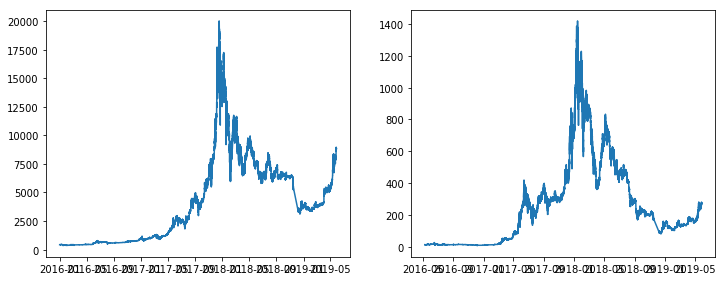

In [57]:
fig = plt.figure(1, figsize=(12,10))
tmp_fig = fig.add_subplot(2,2,1)

plt.plot(crypto_data.iloc[:df_btc.iloc[-1:].index[0], 0], crypto_data.iloc[:df_btc.iloc[-1:].index[0], 3], label="BTC")
tmp_fig = fig.add_subplot(2,2,2)
plt.plot(crypto_data.iloc[df_btc.iloc[-1:].index[0]+1:, 0], crypto_data.iloc[df_btc.iloc[-1:].index[0]+1:, 3], label="ETH")

# Plot all BTC,ETH values

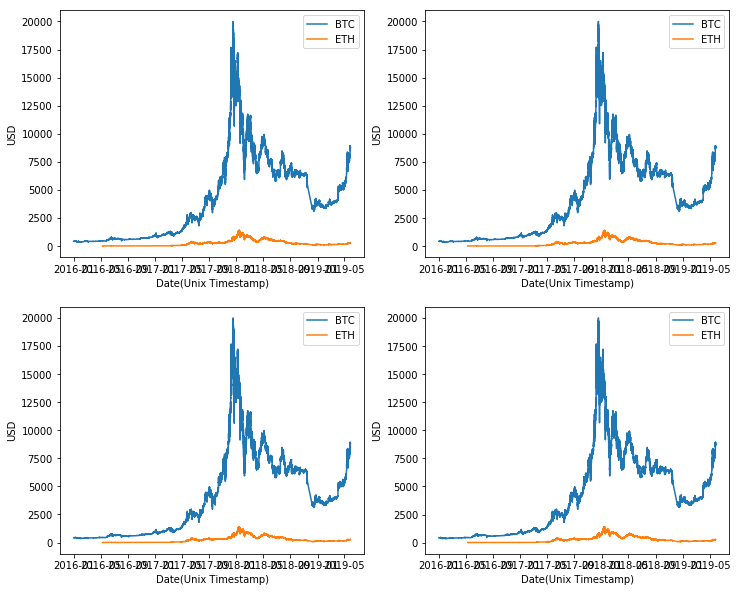

In [53]:
#btc - 30563
#eth - 55991
#ltc - 60059
#zec - 67655

fig = plt.figure(1, figsize=(12,10))
for i in range(2, 6):
    tmp_fig = fig.add_subplot(2,2,i-1)
    plt.plot(crypto_data.iloc[:df_btc.iloc[-1:].index[0], 0], crypto_data.iloc[:df_btc.iloc[-1:].index[0], i], label="BTC") #Open
    plt.plot(crypto_data.iloc[df_btc.iloc[-1:].index[0]+1:, 0], crypto_data.iloc[df_btc.iloc[-1:].index[0]+1:, i], label="ETH")
    plt.legend()
    plt.ylabel('USD')
    plt.xlabel('Date(Unix Timestamp)')

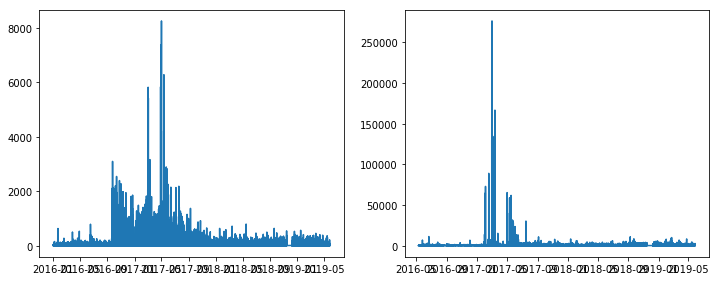

In [60]:
fig2 = plt.figure(1, figsize=(12,10))

tmp_fig = fig2.add_subplot(2,2,1)
plt.plot(crypto_data.iloc[:df_btc.iloc[-1:].index[0], 0], crypto_data.iloc[:df_btc.iloc[-1:].index[0], 6], label="BTC") #Open
tmp_fig = fig2.add_subplot(2,2,2)
plt.plot(crypto_data.iloc[df_btc.iloc[-1:].index[0]+1:, 0], crypto_data.iloc[df_btc.iloc[-1:].index[0]+1:, 6], label="ETH")

# Creating df_btc_etc

In [24]:
df_btc.drop(['Symbol'], axis=1, inplace=True, errors='ignore')
df_btc.head()

,Date,Open,High,Low,Close,Volume
0,2016-01-01 00:00:00,429.95,429.95,429.95,429.95,0.0
1,2016-01-01 00:01:00,429.95,429.95,429.95,429.95,0.0
2,2016-01-01 00:02:00,429.95,429.95,429.95,429.95,0.0
3,2016-01-01 00:03:00,429.95,429.95,429.95,429.95,0.0
4,2016-01-01 00:04:00,429.95,429.95,429.95,429.95,0.0


In [25]:
df_eth.drop(['Symbol'], axis=1, inplace=True, errors='ignore')
df_eth.head()

,Date,Open,High,Low,Close,Volume
0,2016-05-09 13:32:00,0.0,12.0,0.0,12.0,4.156276
1,2016-05-09 13:33:00,12.0,12.0,10.0,10.0,43.497506
2,2016-05-09 13:34:00,10.0,10.0,10.0,10.0,8.000000
3,2016-05-09 13:35:00,10.0,10.0,10.0,10.0,60.000000
4,2016-05-09 13:36:00,10.0,10.0,10.0,10.0,0.375000


In [26]:
#sort from same date btc and etc

df_btc = df_btc[df_btc.Date.dt.date > datetime.date(2016, 5, 9)]
df_eth = df_eth[df_eth.Date.dt.date > datetime.date(2016, 5, 9)]

In [27]:
#reset index to 0,1,2,...
df_btc = df_btc.reset_index(drop = True)
df_eth = df_eth.reset_index(drop = True)

In [28]:
#take evry 5 row and reset index
df_btc = df_btc.iloc[::5, :]
df_btc = df_btc.reset_index(drop = True)

df_btc.head()

,Date,Open,High,Low,Close,Volume
0,2016-05-10 00:00:00,460.98,460.98,460.98,460.98,0.43892
1,2016-05-10 00:05:00,460.98,460.98,460.98,460.98,0.00000
2,2016-05-10 00:10:00,460.98,460.98,460.98,460.98,0.03733
3,2016-05-10 00:15:00,460.98,460.98,460.98,460.98,0.00000
4,2016-05-10 00:20:00,460.98,460.98,460.98,460.98,0.00000


In [29]:
df_eth = df_eth.iloc[::5, :]
df_eth = df_eth.reset_index(drop = True)

df_eth.head()

,Date,Open,High,Low,Close,Volume
0,2016-05-10 00:00:00,9.36,9.36,9.36,9.36,0.0
1,2016-05-10 00:05:00,9.36,9.36,9.36,9.36,0.0
2,2016-05-10 00:10:00,9.36,9.36,9.36,9.36,0.0
3,2016-05-10 00:15:00,9.36,9.36,9.36,9.36,0.0
4,2016-05-10 00:20:00,9.36,9.36,9.36,9.36,0.0


In [30]:
df_btc.shape, df_eth.shape

((311725, 6), (311726, 6))

In [47]:
df_btc['Mean'] = (df_btc['High']+df_btc['Low'])/2

In [38]:
df_btc.drop(['Open', 'Close'], axis=1, inplace=True, errors='ignore')

In [50]:
df_btc.head()

,Date,High,Low,Volume,Mean
0,2016-05-10 00:00:00,460.98,460.98,0.43892,460.98
1,2016-05-10 00:05:00,460.98,460.98,0.00000,460.98
2,2016-05-10 00:10:00,460.98,460.98,0.03733,460.98
3,2016-05-10 00:15:00,460.98,460.98,0.00000,460.98
4,2016-05-10 00:20:00,460.98,460.98,0.00000,460.98


In [125]:
df_btc_model = pd.DataFrame()

for index in range(0, df_btc.iloc[-1:].index[0], 12):
    df_tmp_btc = df_btc.iloc[index:index+288]
    df_tmp_btc = pd.DataFrame(df_tmp_btc[['Mean']].values.reshape(1, -1))
    df_tmp_btc['Date'] = df_btc['Date'].dt.date[index]
    
    df_btc_model = df_btc_model.append(df_tmp_btc, ignore_index=True)
    print(index)
    if index >= df_btc.iloc[-288:].index[0]:
        break

0
12
24
36
48
60
72
84
96
108
120
132
144
156
168
180
192
204
216
228
240
252
264
276
288
300
312
324
336
348
360
372
384
396
408
420
432
444
456
468
480
492
504
516
528
540
552
564
576
588
600
612
624
636
648
660
672
684
696
708
720
732
744
756
768
780
792
804
816
828
840
852
864
876
888
900
912
924
936
948
960
972
984
996
1008
1020
1032
1044
1056
1068
1080
1092
1104
1116
1128
1140
1152
1164
1176
1188
1200
1212
1224
1236
1248
1260
1272
1284
1296
1308
1320
1332
1344
1356
1368
1380
1392
1404
1416
1428
1440
1452
1464
1476
1488
1500
1512
1524
1536
1548
1560
1572
1584
1596
1608
1620
1632
1644
1656
1668
1680
1692
1704
1716
1728
1740
1752
1764
1776
1788
1800
1812
1824
1836
1848
1860
1872
1884
1896
1908
1920
1932
1944
1956
1968
1980
1992
2004
2016
2028
2040
2052
2064
2076
2088
2100
2112
2124
2136
2148
2160
2172
2184
2196
2208
2220
2232
2244
2256
2268
2280
2292
2304
2316
2328
2340
2352
2364
2376
2388
2400
2412
2424
2436
2448
2460
2472
2484
2496
2508
2520
2532
2544
2556
2568
2580
2592
2604
2616

18240
18252
18264
18276
18288
18300
18312
18324
18336
18348
18360
18372
18384
18396
18408
18420
18432
18444
18456
18468
18480
18492
18504
18516
18528
18540
18552
18564
18576
18588
18600
18612
18624
18636
18648
18660
18672
18684
18696
18708
18720
18732
18744
18756
18768
18780
18792
18804
18816
18828
18840
18852
18864
18876
18888
18900
18912
18924
18936
18948
18960
18972
18984
18996
19008
19020
19032
19044
19056
19068
19080
19092
19104
19116
19128
19140
19152
19164
19176
19188
19200
19212
19224
19236
19248
19260
19272
19284
19296
19308
19320
19332
19344
19356
19368
19380
19392
19404
19416
19428
19440
19452
19464
19476
19488
19500
19512
19524
19536
19548
19560
19572
19584
19596
19608
19620
19632
19644
19656
19668
19680
19692
19704
19716
19728
19740
19752
19764
19776
19788
19800
19812
19824
19836
19848
19860
19872
19884
19896
19908
19920
19932
19944
19956
19968
19980
19992
20004
20016
20028
20040
20052
20064
20076
20088
20100
20112
20124
20136
20148
20160
20172
20184
20196
20208
20220
2023

34620
34632
34644
34656
34668
34680
34692
34704
34716
34728
34740
34752
34764
34776
34788
34800
34812
34824
34836
34848
34860
34872
34884
34896
34908
34920
34932
34944
34956
34968
34980
34992
35004
35016
35028
35040
35052
35064
35076
35088
35100
35112
35124
35136
35148
35160
35172
35184
35196
35208
35220
35232
35244
35256
35268
35280
35292
35304
35316
35328
35340
35352
35364
35376
35388
35400
35412
35424
35436
35448
35460
35472
35484
35496
35508
35520
35532
35544
35556
35568
35580
35592
35604
35616
35628
35640
35652
35664
35676
35688
35700
35712
35724
35736
35748
35760
35772
35784
35796
35808
35820
35832
35844
35856
35868
35880
35892
35904
35916
35928
35940
35952
35964
35976
35988
36000
36012
36024
36036
36048
36060
36072
36084
36096
36108
36120
36132
36144
36156
36168
36180
36192
36204
36216
36228
36240
36252
36264
36276
36288
36300
36312
36324
36336
36348
36360
36372
36384
36396
36408
36420
36432
36444
36456
36468
36480
36492
36504
36516
36528
36540
36552
36564
36576
36588
36600
3661

51000
51012
51024
51036
51048
51060
51072
51084
51096
51108
51120
51132
51144
51156
51168
51180
51192
51204
51216
51228
51240
51252
51264
51276
51288
51300
51312
51324
51336
51348
51360
51372
51384
51396
51408
51420
51432
51444
51456
51468
51480
51492
51504
51516
51528
51540
51552
51564
51576
51588
51600
51612
51624
51636
51648
51660
51672
51684
51696
51708
51720
51732
51744
51756
51768
51780
51792
51804
51816
51828
51840
51852
51864
51876
51888
51900
51912
51924
51936
51948
51960
51972
51984
51996
52008
52020
52032
52044
52056
52068
52080
52092
52104
52116
52128
52140
52152
52164
52176
52188
52200
52212
52224
52236
52248
52260
52272
52284
52296
52308
52320
52332
52344
52356
52368
52380
52392
52404
52416
52428
52440
52452
52464
52476
52488
52500
52512
52524
52536
52548
52560
52572
52584
52596
52608
52620
52632
52644
52656
52668
52680
52692
52704
52716
52728
52740
52752
52764
52776
52788
52800
52812
52824
52836
52848
52860
52872
52884
52896
52908
52920
52932
52944
52956
52968
52980
5299

67380
67392
67404
67416
67428
67440
67452
67464
67476
67488
67500
67512
67524
67536
67548
67560
67572
67584
67596
67608
67620
67632
67644
67656
67668
67680
67692
67704
67716
67728
67740
67752
67764
67776
67788
67800
67812
67824
67836
67848
67860
67872
67884
67896
67908
67920
67932
67944
67956
67968
67980
67992
68004
68016
68028
68040
68052
68064
68076
68088
68100
68112
68124
68136
68148
68160
68172
68184
68196
68208
68220
68232
68244
68256
68268
68280
68292
68304
68316
68328
68340
68352
68364
68376
68388
68400
68412
68424
68436
68448
68460
68472
68484
68496
68508
68520
68532
68544
68556
68568
68580
68592
68604
68616
68628
68640
68652
68664
68676
68688
68700
68712
68724
68736
68748
68760
68772
68784
68796
68808
68820
68832
68844
68856
68868
68880
68892
68904
68916
68928
68940
68952
68964
68976
68988
69000
69012
69024
69036
69048
69060
69072
69084
69096
69108
69120
69132
69144
69156
69168
69180
69192
69204
69216
69228
69240
69252
69264
69276
69288
69300
69312
69324
69336
69348
69360
6937

83760
83772
83784
83796
83808
83820
83832
83844
83856
83868
83880
83892
83904
83916
83928
83940
83952
83964
83976
83988
84000
84012
84024
84036
84048
84060
84072
84084
84096
84108
84120
84132
84144
84156
84168
84180
84192
84204
84216
84228
84240
84252
84264
84276
84288
84300
84312
84324
84336
84348
84360
84372
84384
84396
84408
84420
84432
84444
84456
84468
84480
84492
84504
84516
84528
84540
84552
84564
84576
84588
84600
84612
84624
84636
84648
84660
84672
84684
84696
84708
84720
84732
84744
84756
84768
84780
84792
84804
84816
84828
84840
84852
84864
84876
84888
84900
84912
84924
84936
84948
84960
84972
84984
84996
85008
85020
85032
85044
85056
85068
85080
85092
85104
85116
85128
85140
85152
85164
85176
85188
85200
85212
85224
85236
85248
85260
85272
85284
85296
85308
85320
85332
85344
85356
85368
85380
85392
85404
85416
85428
85440
85452
85464
85476
85488
85500
85512
85524
85536
85548
85560
85572
85584
85596
85608
85620
85632
85644
85656
85668
85680
85692
85704
85716
85728
85740
8575

100116
100128
100140
100152
100164
100176
100188
100200
100212
100224
100236
100248
100260
100272
100284
100296
100308
100320
100332
100344
100356
100368
100380
100392
100404
100416
100428
100440
100452
100464
100476
100488
100500
100512
100524
100536
100548
100560
100572
100584
100596
100608
100620
100632
100644
100656
100668
100680
100692
100704
100716
100728
100740
100752
100764
100776
100788
100800
100812
100824
100836
100848
100860
100872
100884
100896
100908
100920
100932
100944
100956
100968
100980
100992
101004
101016
101028
101040
101052
101064
101076
101088
101100
101112
101124
101136
101148
101160
101172
101184
101196
101208
101220
101232
101244
101256
101268
101280
101292
101304
101316
101328
101340
101352
101364
101376
101388
101400
101412
101424
101436
101448
101460
101472
101484
101496
101508
101520
101532
101544
101556
101568
101580
101592
101604
101616
101628
101640
101652
101664
101676
101688
101700
101712
101724
101736
101748
101760
101772
101784
101796
101808
101820

114156
114168
114180
114192
114204
114216
114228
114240
114252
114264
114276
114288
114300
114312
114324
114336
114348
114360
114372
114384
114396
114408
114420
114432
114444
114456
114468
114480
114492
114504
114516
114528
114540
114552
114564
114576
114588
114600
114612
114624
114636
114648
114660
114672
114684
114696
114708
114720
114732
114744
114756
114768
114780
114792
114804
114816
114828
114840
114852
114864
114876
114888
114900
114912
114924
114936
114948
114960
114972
114984
114996
115008
115020
115032
115044
115056
115068
115080
115092
115104
115116
115128
115140
115152
115164
115176
115188
115200
115212
115224
115236
115248
115260
115272
115284
115296
115308
115320
115332
115344
115356
115368
115380
115392
115404
115416
115428
115440
115452
115464
115476
115488
115500
115512
115524
115536
115548
115560
115572
115584
115596
115608
115620
115632
115644
115656
115668
115680
115692
115704
115716
115728
115740
115752
115764
115776
115788
115800
115812
115824
115836
115848
115860

128196
128208
128220
128232
128244
128256
128268
128280
128292
128304
128316
128328
128340
128352
128364
128376
128388
128400
128412
128424
128436
128448
128460
128472
128484
128496
128508
128520
128532
128544
128556
128568
128580
128592
128604
128616
128628
128640
128652
128664
128676
128688
128700
128712
128724
128736
128748
128760
128772
128784
128796
128808
128820
128832
128844
128856
128868
128880
128892
128904
128916
128928
128940
128952
128964
128976
128988
129000
129012
129024
129036
129048
129060
129072
129084
129096
129108
129120
129132
129144
129156
129168
129180
129192
129204
129216
129228
129240
129252
129264
129276
129288
129300
129312
129324
129336
129348
129360
129372
129384
129396
129408
129420
129432
129444
129456
129468
129480
129492
129504
129516
129528
129540
129552
129564
129576
129588
129600
129612
129624
129636
129648
129660
129672
129684
129696
129708
129720
129732
129744
129756
129768
129780
129792
129804
129816
129828
129840
129852
129864
129876
129888
129900

142236
142248
142260
142272
142284
142296
142308
142320
142332
142344
142356
142368
142380
142392
142404
142416
142428
142440
142452
142464
142476
142488
142500
142512
142524
142536
142548
142560
142572
142584
142596
142608
142620
142632
142644
142656
142668
142680
142692
142704
142716
142728
142740
142752
142764
142776
142788
142800
142812
142824
142836
142848
142860
142872
142884
142896
142908
142920
142932
142944
142956
142968
142980
142992
143004
143016
143028
143040
143052
143064
143076
143088
143100
143112
143124
143136
143148
143160
143172
143184
143196
143208
143220
143232
143244
143256
143268
143280
143292
143304
143316
143328
143340
143352
143364
143376
143388
143400
143412
143424
143436
143448
143460
143472
143484
143496
143508
143520
143532
143544
143556
143568
143580
143592
143604
143616
143628
143640
143652
143664
143676
143688
143700
143712
143724
143736
143748
143760
143772
143784
143796
143808
143820
143832
143844
143856
143868
143880
143892
143904
143916
143928
143940

156276
156288
156300
156312
156324
156336
156348
156360
156372
156384
156396
156408
156420
156432
156444
156456
156468
156480
156492
156504
156516
156528
156540
156552
156564
156576
156588
156600
156612
156624
156636
156648
156660
156672
156684
156696
156708
156720
156732
156744
156756
156768
156780
156792
156804
156816
156828
156840
156852
156864
156876
156888
156900
156912
156924
156936
156948
156960
156972
156984
156996
157008
157020
157032
157044
157056
157068
157080
157092
157104
157116
157128
157140
157152
157164
157176
157188
157200
157212
157224
157236
157248
157260
157272
157284
157296
157308
157320
157332
157344
157356
157368
157380
157392
157404
157416
157428
157440
157452
157464
157476
157488
157500
157512
157524
157536
157548
157560
157572
157584
157596
157608
157620
157632
157644
157656
157668
157680
157692
157704
157716
157728
157740
157752
157764
157776
157788
157800
157812
157824
157836
157848
157860
157872
157884
157896
157908
157920
157932
157944
157956
157968
157980

170316
170328
170340
170352
170364
170376
170388
170400
170412
170424
170436
170448
170460
170472
170484
170496
170508
170520
170532
170544
170556
170568
170580
170592
170604
170616
170628
170640
170652
170664
170676
170688
170700
170712
170724
170736
170748
170760
170772
170784
170796
170808
170820
170832
170844
170856
170868
170880
170892
170904
170916
170928
170940
170952
170964
170976
170988
171000
171012
171024
171036
171048
171060
171072
171084
171096
171108
171120
171132
171144
171156
171168
171180
171192
171204
171216
171228
171240
171252
171264
171276
171288
171300
171312
171324
171336
171348
171360
171372
171384
171396
171408
171420
171432
171444
171456
171468
171480
171492
171504
171516
171528
171540
171552
171564
171576
171588
171600
171612
171624
171636
171648
171660
171672
171684
171696
171708
171720
171732
171744
171756
171768
171780
171792
171804
171816
171828
171840
171852
171864
171876
171888
171900
171912
171924
171936
171948
171960
171972
171984
171996
172008
172020

184356
184368
184380
184392
184404
184416
184428
184440
184452
184464
184476
184488
184500
184512
184524
184536
184548
184560
184572
184584
184596
184608
184620
184632
184644
184656
184668
184680
184692
184704
184716
184728
184740
184752
184764
184776
184788
184800
184812
184824
184836
184848
184860
184872
184884
184896
184908
184920
184932
184944
184956
184968
184980
184992
185004
185016
185028
185040
185052
185064
185076
185088
185100
185112
185124
185136
185148
185160
185172
185184
185196
185208
185220
185232
185244
185256
185268
185280
185292
185304
185316
185328
185340
185352
185364
185376
185388
185400
185412
185424
185436
185448
185460
185472
185484
185496
185508
185520
185532
185544
185556
185568
185580
185592
185604
185616
185628
185640
185652
185664
185676
185688
185700
185712
185724
185736
185748
185760
185772
185784
185796
185808
185820
185832
185844
185856
185868
185880
185892
185904
185916
185928
185940
185952
185964
185976
185988
186000
186012
186024
186036
186048
186060

198396
198408
198420
198432
198444
198456
198468
198480
198492
198504
198516
198528
198540
198552
198564
198576
198588
198600
198612
198624
198636
198648
198660
198672
198684
198696
198708
198720
198732
198744
198756
198768
198780
198792
198804
198816
198828
198840
198852
198864
198876
198888
198900
198912
198924
198936
198948
198960
198972
198984
198996
199008
199020
199032
199044
199056
199068
199080
199092
199104
199116
199128
199140
199152
199164
199176
199188
199200
199212
199224
199236
199248
199260
199272
199284
199296
199308
199320
199332
199344
199356
199368
199380
199392
199404
199416
199428
199440
199452
199464
199476
199488
199500
199512
199524
199536
199548
199560
199572
199584
199596
199608
199620
199632
199644
199656
199668
199680
199692
199704
199716
199728
199740
199752
199764
199776
199788
199800
199812
199824
199836
199848
199860
199872
199884
199896
199908
199920
199932
199944
199956
199968
199980
199992
200004
200016
200028
200040
200052
200064
200076
200088
200100

212436
212448
212460
212472
212484
212496
212508
212520
212532
212544
212556
212568
212580
212592
212604
212616
212628
212640
212652
212664
212676
212688
212700
212712
212724
212736
212748
212760
212772
212784
212796
212808
212820
212832
212844
212856
212868
212880
212892
212904
212916
212928
212940
212952
212964
212976
212988
213000
213012
213024
213036
213048
213060
213072
213084
213096
213108
213120
213132
213144
213156
213168
213180
213192
213204
213216
213228
213240
213252
213264
213276
213288
213300
213312
213324
213336
213348
213360
213372
213384
213396
213408
213420
213432
213444
213456
213468
213480
213492
213504
213516
213528
213540
213552
213564
213576
213588
213600
213612
213624
213636
213648
213660
213672
213684
213696
213708
213720
213732
213744
213756
213768
213780
213792
213804
213816
213828
213840
213852
213864
213876
213888
213900
213912
213924
213936
213948
213960
213972
213984
213996
214008
214020
214032
214044
214056
214068
214080
214092
214104
214116
214128
214140

226476
226488
226500
226512
226524
226536
226548
226560
226572
226584
226596
226608
226620
226632
226644
226656
226668
226680
226692
226704
226716
226728
226740
226752
226764
226776
226788
226800
226812
226824
226836
226848
226860
226872
226884
226896
226908
226920
226932
226944
226956
226968
226980
226992
227004
227016
227028
227040
227052
227064
227076
227088
227100
227112
227124
227136
227148
227160
227172
227184
227196
227208
227220
227232
227244
227256
227268
227280
227292
227304
227316
227328
227340
227352
227364
227376
227388
227400
227412
227424
227436
227448
227460
227472
227484
227496
227508
227520
227532
227544
227556
227568
227580
227592
227604
227616
227628
227640
227652
227664
227676
227688
227700
227712
227724
227736
227748
227760
227772
227784
227796
227808
227820
227832
227844
227856
227868
227880
227892
227904
227916
227928
227940
227952
227964
227976
227988
228000
228012
228024
228036
228048
228060
228072
228084
228096
228108
228120
228132
228144
228156
228168
228180

240516
240528
240540
240552
240564
240576
240588
240600
240612
240624
240636
240648
240660
240672
240684
240696
240708
240720
240732
240744
240756
240768
240780
240792
240804
240816
240828
240840
240852
240864
240876
240888
240900
240912
240924
240936
240948
240960
240972
240984
240996
241008
241020
241032
241044
241056
241068
241080
241092
241104
241116
241128
241140
241152
241164
241176
241188
241200
241212
241224
241236
241248
241260
241272
241284
241296
241308
241320
241332
241344
241356
241368
241380
241392
241404
241416
241428
241440
241452
241464
241476
241488
241500
241512
241524
241536
241548
241560
241572
241584
241596
241608
241620
241632
241644
241656
241668
241680
241692
241704
241716
241728
241740
241752
241764
241776
241788
241800
241812
241824
241836
241848
241860
241872
241884
241896
241908
241920
241932
241944
241956
241968
241980
241992
242004
242016
242028
242040
242052
242064
242076
242088
242100
242112
242124
242136
242148
242160
242172
242184
242196
242208
242220

254556
254568
254580
254592
254604
254616
254628
254640
254652
254664
254676
254688
254700
254712
254724
254736
254748
254760
254772
254784
254796
254808
254820
254832
254844
254856
254868
254880
254892
254904
254916
254928
254940
254952
254964
254976
254988
255000
255012
255024
255036
255048
255060
255072
255084
255096
255108
255120
255132
255144
255156
255168
255180
255192
255204
255216
255228
255240
255252
255264
255276
255288
255300
255312
255324
255336
255348
255360
255372
255384
255396
255408
255420
255432
255444
255456
255468
255480
255492
255504
255516
255528
255540
255552
255564
255576
255588
255600
255612
255624
255636
255648
255660
255672
255684
255696
255708
255720
255732
255744
255756
255768
255780
255792
255804
255816
255828
255840
255852
255864
255876
255888
255900
255912
255924
255936
255948
255960
255972
255984
255996
256008
256020
256032
256044
256056
256068
256080
256092
256104
256116
256128
256140
256152
256164
256176
256188
256200
256212
256224
256236
256248
256260

268596
268608
268620
268632
268644
268656
268668
268680
268692
268704
268716
268728
268740
268752
268764
268776
268788
268800
268812
268824
268836
268848
268860
268872
268884
268896
268908
268920
268932
268944
268956
268968
268980
268992
269004
269016
269028
269040
269052
269064
269076
269088
269100
269112
269124
269136
269148
269160
269172
269184
269196
269208
269220
269232
269244
269256
269268
269280
269292
269304
269316
269328
269340
269352
269364
269376
269388
269400
269412
269424
269436
269448
269460
269472
269484
269496
269508
269520
269532
269544
269556
269568
269580
269592
269604
269616
269628
269640
269652
269664
269676
269688
269700
269712
269724
269736
269748
269760
269772
269784
269796
269808
269820
269832
269844
269856
269868
269880
269892
269904
269916
269928
269940
269952
269964
269976
269988
270000
270012
270024
270036
270048
270060
270072
270084
270096
270108
270120
270132
270144
270156
270168
270180
270192
270204
270216
270228
270240
270252
270264
270276
270288
270300

282636
282648
282660
282672
282684
282696
282708
282720
282732
282744
282756
282768
282780
282792
282804
282816
282828
282840
282852
282864
282876
282888
282900
282912
282924
282936
282948
282960
282972
282984
282996
283008
283020
283032
283044
283056
283068
283080
283092
283104
283116
283128
283140
283152
283164
283176
283188
283200
283212
283224
283236
283248
283260
283272
283284
283296
283308
283320
283332
283344
283356
283368
283380
283392
283404
283416
283428
283440
283452
283464
283476
283488
283500
283512
283524
283536
283548
283560
283572
283584
283596
283608
283620
283632
283644
283656
283668
283680
283692
283704
283716
283728
283740
283752
283764
283776
283788
283800
283812
283824
283836
283848
283860
283872
283884
283896
283908
283920
283932
283944
283956
283968
283980
283992
284004
284016
284028
284040
284052
284064
284076
284088
284100
284112
284124
284136
284148
284160
284172
284184
284196
284208
284220
284232
284244
284256
284268
284280
284292
284304
284316
284328
284340

296676
296688
296700
296712
296724
296736
296748
296760
296772
296784
296796
296808
296820
296832
296844
296856
296868
296880
296892
296904
296916
296928
296940
296952
296964
296976
296988
297000
297012
297024
297036
297048
297060
297072
297084
297096
297108
297120
297132
297144
297156
297168
297180
297192
297204
297216
297228
297240
297252
297264
297276
297288
297300
297312
297324
297336
297348
297360
297372
297384
297396
297408
297420
297432
297444
297456
297468
297480
297492
297504
297516
297528
297540
297552
297564
297576
297588
297600
297612
297624
297636
297648
297660
297672
297684
297696
297708
297720
297732
297744
297756
297768
297780
297792
297804
297816
297828
297840
297852
297864
297876
297888
297900
297912
297924
297936
297948
297960
297972
297984
297996
298008
298020
298032
298044
298056
298068
298080
298092
298104
298116
298128
298140
298152
298164
298176
298188
298200
298212
298224
298236
298248
298260
298272
298284
298296
298308
298320
298332
298344
298356
298368
298380

310716
310728
310740
310752
310764
310776
310788
310800
310812
310824
310836
310848
310860
310872
310884
310896
310908
310920
310932
310944
310956
310968
310980
310992
311004
311016
311028
311040
311052
311064
311076
311088
311100
311112
311124
311136
311148
311160
311172
311184
311196
311208
311220
311232
311244
311256
311268
311280
311292
311304
311316
311328
311340
311352
311364
311376
311388
311400
311412
311424
311436


C:\Users\Marcin\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


311448


In [79]:
index=0
df_tmp_btc = df_btc.iloc[index:index+288]
df_tmp_btc = pd.DataFrame(df_tmp_btc[['Mean']].values.reshape(1, -1))
df_tmp_btc['Date'] = df_btc['Date'].dt.date[index]


df_tmp_btc['Mean_X'] = df_tmp_btc.iloc[: ,276:288].mean(axis=1)
df_tmp_btc['Variance_X'] = df_tmp_btc.iloc[: ,276:288].var(axis=1)
df_tmp_btc['Min_X'] = df_tmp_btc.iloc[: ,276:288].values.min(axis=1)
df_tmp_btc['Max_X'] = df_tmp_btc.iloc[: ,276:288].values.max(axis=1)
df_tmp_btc.drop(df_tmp_btc.iloc[: ,276:288], axis =1, inplace=True)

df_tmp_btc

,0,1,2,3,4,5,6,7,8,9,...,283,284,285,286,287,Date,Mean_X,Variance_X,Min_X,Max_X
0,460.98,460.98,460.98,460.98,460.98,460.98,460.97,460.975,460.98,460.98,...,451.75,451.75,451.75,451.75,451.75,2016-05-10,452.093333,0.439333,451.75,453.75


In [90]:
df_tmp_btc.drop(df_tmp_btc.iloc[: ,276:288], axis =1)

,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,Date,Mean_X,Variance_X,Min_X,Max_X
0,460.98,460.98,460.98,460.98,460.98,460.98,460.97,460.975,460.98,460.98,...,453.76,453.76,453.76,453.76,453.76,2016-05-10,452.093333,0.439333,451.75,453.75


In [126]:
df_btc_model['Mean_X'] = df_btc_model.iloc[: ,276:288].mean(axis=1)
df_btc_model['Variance_X'] = df_btc_model.iloc[: ,276:288].var(axis=1)
df_btc_model['Min_X'] = df_btc_model.iloc[: ,276:288].values.min(axis=1)
df_btc_model['Max_X'] = df_btc_model.iloc[: ,276:288].values.max(axis=1)
df_btc_model.drop(df_btc_model.iloc[: ,276:288], axis =1, inplace=True)

In [137]:
df_btc_model.head()

,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,Date,Mean_X,Variance_X,Min_X,Max_X
0,460.98,460.98,460.98,460.98,460.98,460.98,460.970,460.975,460.98,460.98,...,453.76,453.76,453.76,453.76,453.76,1462838400000000000,452.093333,0.439333,451.75,453.75
1,460.98,460.98,460.98,460.98,461.42,461.43,461.430,462.980,462.98,462.98,...,451.75,451.75,451.75,451.75,451.75,1462838400000000000,451.749167,0.000008,451.74,451.75
2,462.98,462.98,462.98,462.98,462.98,462.98,462.980,462.980,462.98,462.98,...,451.75,451.75,451.75,451.75,451.74,1462838400000000000,451.825000,0.031518,451.74,452.21
3,462.98,462.98,462.98,462.97,462.97,462.98,462.980,462.980,462.98,462.98,...,451.75,451.75,451.75,452.20,452.21,1462838400000000000,452.204167,0.000027,452.20,452.21
4,462.98,462.98,462.97,462.97,462.97,461.79,461.785,461.770,461.77,461.77,...,452.21,452.21,452.21,452.21,452.21,1462838400000000000,452.210000,0.000000,452.21,452.21


In [138]:
df_btc_model.dropna(inplace=True)

In [132]:
df_btc_model['Date'] = pd.to_datetime(df_btc_model['Date'])
df_btc_model['Date'] = pd.to_numeric(df_btc_model['Date'])

In [139]:
df = df_btc_model.iloc[:,:-4]
y = df_btc_model.iloc[:,-4:]

In [115]:
def rmse(x,y): return np.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.20)

In [144]:
m = RandomForestRegressor(n_jobs=-1) #njobs=-1 take all cores form your processor
%time m.fit(X_train, y_train)
m.score(X_test,y_test)
#print_score(m)

C:\Users\Marcin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 7.17 s


0.6454261548277701

In [142]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 2000 #size of validation
n_trn = len(df)-n_valid #traing size
raw_train, raw_valid = split_vals(df_btc_model, n_trn) 
X_train, X_valid = split_vals(df, n_trn) #split traing data to train and validation data
y_train, y_valid = split_vals(y, n_trn) #split test to test and valid

X_train.shape, y_train.shape, X_valid.shape

((23954, 277), (23954, 4), (2000, 277))

In [143]:
m = RandomForestRegressor(n_jobs=-1) #njobs=-1 take all cores form your processor
%time m.fit(X_train, y_train)
print_score(m)

C:\Users\Marcin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 7.18 s
[Mean_X          36.171561
Variance_X    3044.015621
Min_X           39.349181
Max_X           36.123048
dtype: float64, Mean_X         140.427417
Variance_X    3491.504160
Min_X          161.560841
Max_X          131.288250
dtype: float64, 0.9128521328586992, -0.21358747260681468]


# create df with mean var min max 

In [157]:
df_btc_eth = pd.DataFrame()

for index in range(0, df_btc.iloc[-1:].index[0], 13):
    df_tmp_btc = df_btc.iloc[index:index+13]
    df_tmp_btc = pd.DataFrame(df_tmp_btc[['Open', 'High', 'Low', 'Close']].values.reshape(1, -1))
    df_tmp_btc['Mean_BTC'] = df_tmp_btc.mean(axis=1)
    df_tmp_btc['Variance_BTC'] = df_tmp_btc.var(axis=1)
    df_tmp_btc['Min_BTC'] = df_tmp_btc.iloc[0, :52].values.min()
    df_tmp_btc['Max_BTC'] = df_tmp_btc.iloc[0, :52].values.max()

    df_tmp_eth = df_eth.iloc[index:index+13]
    df_tmp_eth = pd.DataFrame(df_tmp_eth[['Open', 'High', 'Low', 'Close']].values.reshape(1, -1))
    df_tmp_eth['Mean_ETH'] = df_tmp_eth.mean(axis=1)
    df_tmp_eth['Variance_ETH'] = df_tmp_eth.var(axis=1)
    df_tmp_eth['Min_ETH'] = df_tmp_eth.iloc[0, :52].values.min()
    df_tmp_eth['Max_ETH'] = df_tmp_eth.iloc[0, :52].values.max()


    tmp_concat = pd.concat([df_tmp_btc, df_tmp_eth], axis=1)

    tmp_df = df_eth.iloc[index+13:index+13+13]
    tmp_df = pd.DataFrame(tmp_df[['Open', 'High', 'Low', 'Close']].values.reshape(1, -1))
    tmp_concat['Mean_X'] = tmp_df.mean(axis=1)
    tmp_concat['Variance_X'] = tmp_df.var(axis=1)
    tmp_concat['Min_X'] = tmp_df.iloc[0, :52].values.min()
    tmp_concat['Max_X'] = tmp_df.iloc[0, :52].values.max()
    
    df_btc_eth = df_btc_eth.append(tmp_concat, ignore_index=True)
    
    if index >= df_btc.iloc[-24:].index[0]:
        break

    #print(index)

In [187]:
df_btc_eth.shape

(23978, 116)

In [ ]:
df, y ,nas = proc_df(df_btc_eth, df_btc_eth.iloc[:, -4:])

In [175]:
df_btc_eth.columns[-4:].values

array(['Mean_X', 'Variance_X', 'Min_X', 'Max_X'], dtype=object)

In [205]:
df_btc_eth.columns

Index([             0,              1,              2,              3,
                    4,              5,              6,              7,
                    8,              9,
       ...
                   50,             51,     'Mean_ETH', 'Variance_ETH',
            'Min_ETH',      'Max_ETH',       'Mean_X',   'Variance_X',
              'Min_X',        'Max_X'],
      dtype='object', length=116)

In [204]:
df_btc_eth.to_pickle("./df_btc_eth_mean.pkl")

In [14]:
df_btc_eth = pd.read_pickle("./df_btc_eth_mean.pkl") 

In [177]:
train_cats(df_btc_eth)

In [188]:
df = df_btc_eth.iloc[:,:-4]

In [186]:
y = df_btc_eth.iloc[:,-4:]

In [189]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 2000 #size of validation
n_trn = len(df)-n_valid #traing size
raw_train, raw_valid = split_vals(df_btc_eth, n_trn) 
X_train, X_valid = split_vals(df, n_trn) #split traing data to train and validation data
y_train, y_valid = split_vals(y, n_trn) #split test to test and valid

X_train.shape, y_train.shape, X_valid.shape

((21978, 112), (21978, 4), (2000, 112))

In [199]:
def rmse(x,y): return np.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [194]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.20)

In [202]:
m = RandomForestRegressor(n_jobs=-1) #njobs=-1 take all cores form your processor
%time m.fit(X_train, y_train)
print_score(m)

C:\Users\Marcin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 2.14 s
[Mean_X         1.771884
Variance_X    16.808223
Min_X          2.159795
Max_X          1.934273
dtype: float64, Mean_X        0.777538
Variance_X    5.875486
Min_X         1.131297
Max_X         0.926302
dtype: float64, 0.9986638002209263, 0.9914968162136314]


In [201]:
m = RandomForestRegressor(n_jobs=-1) #njobs=-1 take all cores form your processor
%time m.fit(X_train, y_train)
m.score(X_test,y_test)

C:\Users\Marcin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 2.44 s


0.9875821965546914

In [135]:
#create empty df
df_btc_eth = pd.DataFrame()

for index, row in df_etc.iterrows():
    df_tmp_btc = df_btc.iloc[index:index+24]
    df_tmp_btc = pd.DataFrame(df_tmp_btc[['High', 'Low', 'Volume']].values.reshape(1, -1))

    df_tmp_eth = df_eth.iloc[index:index+24]
    df_tmp_eth = pd.DataFrame(df_tmp_eth[['High', 'Low', 'Volume']].values.reshape(1, -1))

    #add two df to one ,Date and high_x
    tmp_concat = pd.concat([df_tmp_btc, df_tmp_eth], axis=1)
    tmp_concat['Date'] = row.Date
    tmp_concat['High_X'] = df_eth.iloc[index+24][2]
    
    df_btc_eth = df_btc_eth.append(tmp_concat, ignore_index=True)
    
    #if index is 24 from the end break
    if index == df_btc[-25:-24].index:
        break
        
    # get this row and its 23 next btc rows and etc rows
    # put them together as one row
    # add the created row to the df_btc_etc
    

In [142]:
colname=['High', 'Low', 'Volume']
symbol_name=['BTC', 'ETH']
colnames_li=[]
for symbol in symbol_name:
    for i in range(24):
        for col in colname:
            col_names= [symbol + '_' + col + '_H_' + str(i)]
            #print(col_names)
            colnames_li.append(col_names)

#change column names from colnames_li(list)
for j in range(len(df_btc_eth.columns)-2):
    df_btc_eth.columns.values[j] = colnames_li[j][0]

In [165]:
df_btc_eth.to_pickle("./df_btc_eth.pkl")

In [105]:
df_btc_eth = pd.read_pickle("./df_btc_eth.pkl")

In [106]:
df_btc_eth.head()

,BTC_High_H_0,BTC_Low_H_0,BTC_Volume_H_0,BTC_High_H_1,BTC_Low_H_1,BTC_Volume_H_1,BTC_High_H_2,BTC_Low_H_2,BTC_Volume_H_2,BTC_High_H_3,...,ETH_Low_H_21,ETH_Volume_H_21,ETH_High_H_22,ETH_Low_H_22,ETH_Volume_H_22,ETH_High_H_23,ETH_Low_H_23,ETH_Volume_H_23,Date,High_X
0,460.98,460.97,6.215813,462.98,460.98,7.921840,462.98,462.98,2.257109,462.98,...,9.93,100.176056,9.93,9.93,0.000000,9.93,9.40,104.423000,2016-05-10 00:00:00,9.94
1,462.98,460.98,7.921840,462.98,462.98,2.257109,462.98,462.97,2.589760,462.98,...,9.93,0.000000,9.93,9.40,104.423000,9.94,9.68,50.176056,2016-05-10 01:00:00,9.95
2,462.98,462.98,2.257109,462.98,462.97,2.589760,462.98,461.77,8.029085,461.77,...,9.40,104.423000,9.94,9.68,50.176056,9.95,9.94,50.000000,2016-05-10 02:00:00,9.95
3,462.98,462.97,2.589760,462.98,461.77,8.029085,461.77,461.58,2.506785,461.58,...,9.68,50.176056,9.95,9.94,50.000000,9.95,9.74,51.100502,2016-05-10 03:00:00,9.74
4,462.98,461.77,8.029085,461.77,461.58,2.506785,461.58,461.57,0.057805,461.58,...,9.94,50.000000,9.95,9.74,51.100502,9.74,9.74,0.000000,2016-05-10 04:00:00,9.74


In [53]:
df_btc_eth = df_btc_eth.reset_index(drop=True)

In [39]:
#drop all col with low in name
df_btc_eth = df_btc_eth[df_btc_eth.columns.drop(list(df_btc_eth.filter(regex='Low')))]

# Predict next value movement (up or down)

In [241]:
df_move = df_btc_eth.copy()

In [242]:
#count difference in value
df_move.loc[:,'High Diff'] = df_move.loc[:,'High_X'].diff()
#if its <0 write up otherwise write down
df_move.loc[:,'Movement'] = np.where(df_move.loc[:,'High Diff']<0,'down','up')
#fill all NaN to 0.00
df_move = df_move.fillna(0)

In [243]:
df_move.drop(['High_X', 'High Diff'], axis=1, inplace=True)

In [244]:
df_move.head()

,BTC_High_H_0,BTC_Low_H_0,BTC_Volume_H_0,BTC_High_H_1,BTC_Low_H_1,BTC_Volume_H_1,BTC_High_H_2,BTC_Low_H_2,BTC_Volume_H_2,BTC_High_H_3,...,ETH_Low_H_21,ETH_Volume_H_21,ETH_High_H_22,ETH_Low_H_22,ETH_Volume_H_22,ETH_High_H_23,ETH_Low_H_23,ETH_Volume_H_23,Date,Movement
0,460.98,460.97,6.215813,462.98,460.98,7.921840,462.98,462.98,2.257109,462.98,...,9.93,100.176056,9.93,9.93,0.000000,9.93,9.40,104.423000,2016-05-10 00:00:00,up
1,462.98,460.98,7.921840,462.98,462.98,2.257109,462.98,462.97,2.589760,462.98,...,9.93,0.000000,9.93,9.40,104.423000,9.94,9.68,50.176056,2016-05-10 01:00:00,up
2,462.98,462.98,2.257109,462.98,462.97,2.589760,462.98,461.77,8.029085,461.77,...,9.40,104.423000,9.94,9.68,50.176056,9.95,9.94,50.000000,2016-05-10 02:00:00,up
3,462.98,462.97,2.589760,462.98,461.77,8.029085,461.77,461.58,2.506785,461.58,...,9.68,50.176056,9.95,9.94,50.000000,9.95,9.74,51.100502,2016-05-10 03:00:00,down
4,462.98,461.77,8.029085,461.77,461.58,2.506785,461.58,461.57,0.057805,461.58,...,9.94,50.000000,9.95,9.74,51.100502,9.74,9.74,0.000000,2016-05-10 04:00:00,up


In [245]:
b = df_move.copy()
b['Date'] = pd.to_numeric(b['Date'], errors='coerce')

In [160]:
train_cats(b)

In [227]:
b.head(5)

,BTC_High_H_0,BTC_Low_H_0,BTC_Volume_H_0,BTC_High_H_1,BTC_Low_H_1,BTC_Volume_H_1,BTC_High_H_2,BTC_Low_H_2,BTC_Volume_H_2,BTC_High_H_3,...,ETH_Low_H_21,ETH_Volume_H_21,ETH_High_H_22,ETH_Low_H_22,ETH_Volume_H_22,ETH_High_H_23,ETH_Low_H_23,ETH_Volume_H_23,Date,Movement
0,460.98,460.97,6.215813,462.98,460.98,7.921840,462.98,462.98,2.257109,462.98,...,9.93,100.176056,9.93,9.93,0.000000,9.93,9.40,104.423000,1462838400000000000,0
1,462.98,460.98,7.921840,462.98,462.98,2.257109,462.98,462.97,2.589760,462.98,...,9.93,0.000000,9.93,9.40,104.423000,9.94,9.68,50.176056,1462842000000000000,0
2,462.98,462.98,2.257109,462.98,462.97,2.589760,462.98,461.77,8.029085,461.77,...,9.40,104.423000,9.94,9.68,50.176056,9.95,9.94,50.000000,1462845600000000000,0
3,462.98,462.97,2.589760,462.98,461.77,8.029085,461.77,461.58,2.506785,461.58,...,9.68,50.176056,9.95,9.94,50.000000,9.95,9.74,51.100502,1462849200000000000,1
4,462.98,461.77,8.029085,461.77,461.58,2.506785,461.58,461.57,0.057805,461.58,...,9.94,50.000000,9.95,9.74,51.100502,9.74,9.74,0.000000,1462852800000000000,0


In [237]:
df, y ,nas = proc_df(b, 'Movement')

In [238]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 2000 #size of validation
n_trn = len(df)-n_valid #traing size
raw_train, raw_valid = split_vals(b, n_trn) 
X_train, X_valid = split_vals(df, n_trn) #split traing data to train and validation data
y_train, y_valid = split_vals(y, n_trn) #split test to test and valid

X_train.shape, y_train.shape, X_valid.shape

((23393, 145), (23393,), (2000, 145))

In [239]:
m = RandomForestRegressor(n_jobs=-1) #njobs=-1 take all cores form your processor
%time m.fit(X_train, y_train)
print_score(m)

C:\Users\Marcin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 4.37 s
[0.20584998058929638, 0.5198317035349037, 0.828624891647775, -0.08592130009162346]


# Predict next high value

In [34]:
b = df_btc_eth.copy()
b['Date'] = pd.to_numeric(b['Date'], errors='coerce')

In [41]:
df, y ,nas = proc_df(df_btc_eth, 'High_X')

In [42]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 2000 #size of validation
n_trn = len(df)-n_valid #traing size
raw_train, raw_valid = split_vals(df_btc_eth, n_trn) 
X_train, X_valid = split_vals(df, n_trn) #split traing data to train and validation data
y_train, y_valid = split_vals(y, n_trn) #split test to test and valid

X_train.shape, y_train.shape, X_valid.shape

((118, 96), (118,), (941, 96))

In [44]:
m = RandomForestRegressor(n_jobs=-1) #njobs=-1 take all cores form your processor
%time m.fit(X_train, y_train)
print_score(m)

C:\Users\Marcin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 110 ms
[0.22813269257984242, 387.47822445678514, 0.9846685688819948, -0.9423310625568739]


# Create df_dayrow 

In [19]:
df_btc = df_btc.sort_values(by=['Date'], ascending=True)
df_btc = df_btc[df_btc.Date.dt.date > datetime.date(2015, 10, 8)]
df_btc = df_btc[df_btc.Date.dt.date < datetime.date(2019, 4, 4)]
df_btc.head()

,Date,Open,High,Low,Close,Volume
30552,2015-10-09 00:00:00,243.95,243.95,243.6,243.6,3.0
30551,2015-10-09 01:00:00,243.60,243.60,243.6,243.6,0.0
30550,2015-10-09 02:00:00,243.60,243.60,243.6,243.6,0.0
30549,2015-10-09 03:00:00,243.60,243.60,243.6,243.6,0.0
30548,2015-10-09 04:00:00,243.60,243.60,243.6,243.6,0.0


In [20]:
# reset index to 0,1,2,...
df_btc = df_btc.reset_index(drop = True)

In [21]:
#create empty df
df_dayrow = pd.DataFrame()

for index, row in df_btc.iterrows():
   #add to empty df one row with 24 columns
    df_tmp = df_btc.iloc[index:index+24]
    df_tmp = pd.DataFrame(df_tmp[['Open', 'High', 'Low', 'Close', 'Volume']].values.reshape(1, -1))
    df_tmp['Date'] = row.Date
    df_tmp['Open_X'] = df_btc.iloc[index+24][1]
    df_dayrow = df_dayrow.append(df_tmp, ignore_index=True)
    
    #if index is 24 from the end break
    if index == df_btc[-25:-24].index:
        break
        
   # get this row and its 23 next rows
   # put them together as one row
   # add the created row to the df_dayrow

In [23]:
#create colnames_li(list) with column names 
colname=['Open', 'High', 'Low', 'Close', 'Volume']
colnames_li=[]
for i in range(24):
    for col in colname:
        col_names= [col + '_H_' + str(i)]
        #print(col_names)
        colnames_li.append(col_names)\

#change column names from colnames_li(list)
for j in range(len(df_dayrow.columns)-2):
    df_dayrow.columns.values[j] = colnames_li[j][0]

In [24]:
df_dayrow.to_pickle("./df_dayrow.pkl")

In [25]:
df_dayrow = pd.read_pickle("./df_dayrow.pkl")

In [51]:
df_dayrow.head()

,Open_H_0,High_H_0,Low_H_0,Close_H_0,Volume_H_0,Open_H_1,High_H_1,Low_H_1,Close_H_1,Volume_H_1,...,High_H_22,Low_H_22,Close_H_22,Volume_H_22,Open_H_23,High_H_23,Low_H_23,Volume_H_23,Date,Open_X
0,243.95,243.95,243.6,243.6,3.0,243.6,243.6,243.6,243.6,0.0,...,245.39,245.39,245.39,0.000000,245.39,245.39,245.39,0.000800,2015-10-09 00:00:00,245.39
1,243.60,243.60,243.6,243.6,0.0,243.6,243.6,243.6,243.6,0.0,...,245.39,245.39,245.39,0.000800,245.39,245.39,245.39,0.000000,2015-10-09 01:00:00,245.39
2,243.60,243.60,243.6,243.6,0.0,243.6,243.6,243.6,243.6,0.0,...,245.39,245.39,245.39,0.000000,245.39,245.54,245.39,8.119227,2015-10-09 02:00:00,245.54
3,243.60,243.60,243.6,243.6,0.0,243.6,243.6,243.6,243.6,0.0,...,245.54,245.39,245.54,8.119227,245.54,245.54,245.51,0.440000,2015-10-09 03:00:00,245.51
4,243.60,243.60,243.6,243.6,0.0,243.6,243.6,243.6,243.6,0.0,...,245.54,245.51,245.51,0.440000,245.51,245.51,245.51,0.000000,2015-10-09 04:00:00,245.51


# Predict next volume value

In [27]:
#drop all columns except volume
df_volume = df_dayrow[df_dayrow.columns.drop(list(df_dayrow.filter(regex='Open')))]
df_volume = df_volume[df_volume.columns.drop(list(df_volume.filter(regex='Close')))]
df_volume = df_volume[df_volume.columns.drop(list(df_volume.filter(regex='High')))]
df_volume = df_volume[df_volume.columns.drop(list(df_volume.filter(regex='Low')))]

In [31]:
for i in range( len(df_volume)-1):
    df_volume.loc[i, 'Volume_X'] = df_volume.iloc[i+1][23]

In [32]:
df_volume.drop(df_volume.index[30527], inplace=True)

In [93]:
df_volume.head()

,Volume_H_0,Volume_H_1,Volume_H_2,Volume_H_3,Volume_H_4,Volume_H_5,Volume_H_6,Volume_H_7,Volume_H_8,Volume_H_9,...,Volume_H_16,Volume_H_17,Volume_H_18,Volume_H_19,Volume_H_20,Volume_H_21,Volume_H_22,Volume_H_23,Date,Volume_X
0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.229184,0.000000,3.433441,35.687917,4.531416,0.000000,0.000800,2015-10-09 00:00:00,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.229184,0.000000,3.433441,35.687917,4.531416,0.000000,0.000800,0.000000,2015-10-09 01:00:00,8.119227
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,...,0.000000,3.433441,35.687917,4.531416,0.000000,0.000800,0.000000,8.119227,2015-10-09 02:00:00,0.440000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,...,3.433441,35.687917,4.531416,0.000000,0.000800,0.000000,8.119227,0.440000,2015-10-09 03:00:00,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.973254,...,35.687917,4.531416,0.000000,0.000800,0.000000,8.119227,0.440000,0.000000,2015-10-09 04:00:00,15.974476


In [34]:
a = df_volume.copy()
a['Date'] = pd.to_numeric(a['Date'], errors='coerce')

In [35]:
df, y ,nas = proc_df(a, 'Volume_X')

In [36]:
df.columns

Index(['Volume_H_0', 'Volume_H_1', 'Volume_H_2', 'Volume_H_3', 'Volume_H_4',
       'Volume_H_5', 'Volume_H_6', 'Volume_H_7', 'Volume_H_8', 'Volume_H_9',
       'Volume_H_10', 'Volume_H_11', 'Volume_H_12', 'Volume_H_13',
       'Volume_H_14', 'Volume_H_15', 'Volume_H_16', 'Volume_H_17',
       'Volume_H_18', 'Volume_H_19', 'Volume_H_20', 'Volume_H_21',
       'Volume_H_22', 'Volume_H_23', 'Date'],
      dtype='object')

In [37]:
y

array([   0.     ,    8.11923,    0.44   , ..., 1005.93661,  350.50738, 1632.58737])

In [38]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 2000 #size of validation
n_trn = len(df)-n_valid #traing size
raw_train, raw_valid = split_vals(df_volume, n_trn) 
X_train, X_valid = split_vals(df, n_trn) #split traing data to train and validation data
y_train, y_valid = split_vals(y, n_trn) #split test to test and valid

X_train.shape, y_train.shape, X_valid.shape

((28527, 25), (28527,), (2000, 25))

In [39]:
y_train[-1:]

array([93.88562])

In [40]:
y_valid

array([ 176.69183, 1735.38473,  307.87059, ..., 1005.93661,  350.50738, 1632.58737])

In [41]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [42]:
m = RandomForestRegressor(n_jobs=-1) #njobs=-1 take all cores form your processor
%time m.fit(X_train, y_train)
print_score(m)

C:\Users\Marcin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 1.34 s
[117.84167860748796, 358.67395630303565, 0.8743310530645966, -3.199937983880237]


In [43]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1) #njobs=-1 take all cores form your processor
m.fit(X_train, y_train)
print_score(m)

[267.6903273467086, 177.48347263391256, 0.3515216326932986, -0.02839279723619903]


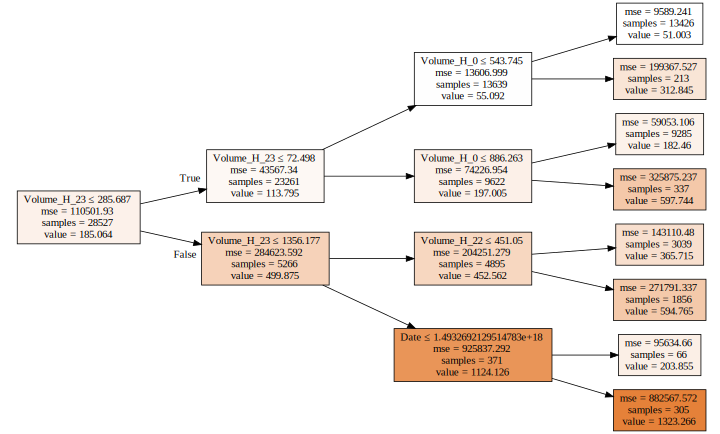

In [44]:
draw_tree(m.estimators_[0], df, precision=3)

In [45]:
m = RandomForestRegressor(n_jobs=-1) 
m.fit(X_train, y_train)  
print_score(m)

C:\Users\Marcin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[114.91494241336919, 242.74643518503936, 0.8804958071573069, -0.9237512406508566]


In [46]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]
#preds take first row and print first predictions
#mean of first predictions
#actual predict   

(array([ 293.88326,  158.31776,  419.65407,   88.5185 ,  147.52351,  153.60331, 1678.63001,  649.93164,
          57.81826,   96.88035]), 374.47606902066, 176.69182551080002)

In [270]:
preds.shape

(10, 2000)

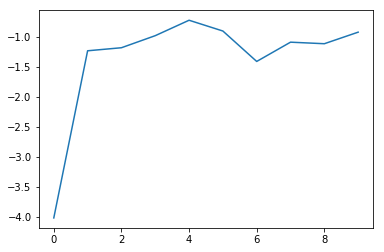

In [47]:
#plot  r2 score, going through each tree and take mean  
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

In [48]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[99.26992926939698, 289.32051614748394, 0.9108203917429424, -1.732761015695758, 0.34947432679609036]


In [49]:
df_trn, y_trn, nas = proc_df(a, 'Volume_X')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

In [50]:
len(X_train)

28527